In [95]:
#importing important libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.metrics import r2_score #for the r square score
from sklearn import linear_model
import seaborn as sns


In [57]:
#uploading the data csv file
df = pd.read_csv(r'C:\Users\Esha\Downloads\650 Statistics for Business\Life-Expectancy-Data-Updated.csv', encoding = 'unicode_escape')

In [58]:
#primary look at the dataframe
df 

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


In [59]:
#information on the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [63]:
#dropping the columns not needed for the analysis and keeping only the numeric columns
columns_to_drop = ['Country' , 'Region','Year','Economy_status_Developed','Economy_status_Developing']

In [64]:
df.drop(columns=columns_to_drop, inplace = True)

In [65]:
df

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy
0,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,0.08,11006,78.53,4.9,4.8,7.8,76.5
1,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,0.09,25742,46.44,0.6,0.5,9.7,82.8
2,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,0.13,1076,1183.21,27.1,28.0,5.0,65.4
3,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,0.79,4146,0.75,5.7,5.5,7.9,67.0
4,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,0.08,33995,7.91,1.2,1.1,12.8,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,0.49,399,11.33,12.8,12.9,1.1,49.9
2860,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,0.02,2515,2.67,2.2,2.3,9.1,66.9
2861,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,0.02,2130,19.39,15.4,15.5,10.3,74.3
2862,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,0.05,7424,3.44,3.3,3.3,11.1,71.8


In [66]:
#defining the independent variable 'X' and dependent variable 'y'
X = df[['Infant_deaths','Under_five_deaths','Adult_mortality','Alcohol_consumption','Hepatitis_B','Measles','BMI','Polio','Diphtheria','Incidents_HIV','GDP_per_capita','Population_mln','Thinness_ten_nineteen_years','Thinness_five_nine_years','Schooling']]
y = df['Life_expectancy']

In [67]:
#finiding the correlation to initally understand the relationship between all the variables
corr = df.corr()

In [19]:
corr

,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Life_expectancy
Infant_deaths,1.000000,0.985651,0.794661,-0.454526,-0.512562,-0.526282,-0.661988,-0.740790,-0.721875,0.349458,-0.512286,0.007622,0.491192,0.477639,-0.788513,-0.920032
Under_five_deaths,0.985651,1.000000,0.802361,-0.409367,-0.507427,-0.512972,-0.665255,-0.742983,-0.725355,0.369618,-0.469682,-0.005234,0.466978,0.450756,-0.773196,-0.920419
Adult_mortality,0.794661,0.802361,1.000000,-0.244794,-0.344882,-0.416153,-0.522866,-0.524226,-0.513803,0.699119,-0.510121,-0.053848,0.382140,0.379792,-0.581035,-0.945360
Alcohol_consumption,-0.454526,-0.409367,-0.244794,1.000000,0.168436,0.318603,0.284032,0.301926,0.299016,-0.034118,0.443966,-0.039119,-0.446366,-0.433030,0.615728,0.399159
Hepatitis_B,-0.512562,-0.507427,-0.344882,0.168436,1.000000,0.429168,0.345421,0.724345,0.761780,-0.075782,0.159375,-0.082396,-0.208453,-0.213794,0.347643,0.417804
Measles,-0.526282,-0.512972,-0.416153,0.318603,0.429168,1.000000,0.416321,0.514096,0.494059,-0.150580,0.313724,-0.098222,-0.340705,-0.366970,0.498391,0.490019
BMI,-0.661988,-0.665255,-0.522866,0.284032,0.345421,0.416321,1.000000,0.457206,0.426501,-0.161142,0.336180,-0.166482,-0.596483,-0.599112,0.635475,0.598423
Polio,-0.740790,-0.742983,-0.524226,0.301926,0.724345,0.514096,0.457206,1.000000,0.953178,-0.147952,0.313786,-0.033486,-0.312685,-0.306998,0.552765,0.641217
Diphtheria,-0.721875,-0.725355,-0.513803,0.299016,0.761780,0.494059,0.426501,0.953178,1.000000,-0.146932,0.313321,-0.027336,-0.304466,-0.295597,0.535621,0.627541
Incidents_HIV,0.349458,0.369618,0.699119,-0.034118,-0.075782,-0.150580,-0.161142,-0.147952,-0.146932,1.000000,-0.169590,-0.058040,0.188765,0.193847,-0.201246,-0.553027


<Axes: >

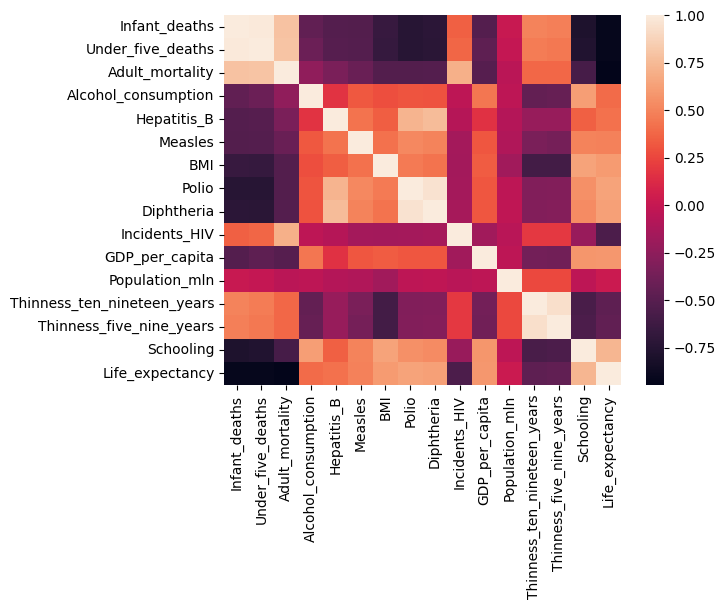

In [68]:
#vizualizing the correlation matrix in a heatmap for a quick understanding.
sns.heatmap(corr)

In [ ]:
#Based on the correlation matrix these variables:Measles,Polio,Diphtheria,Population,Thinness (10-19 yrs),Thinness (5-9 years) are highly correlated 
#and thus are removed from the regression model as the independent variables.


In [69]:
#redefining the independent and dependent variables
X = df[['Infant_deaths','Under_five_deaths','Adult_mortality','Alcohol_consumption','Hepatitis_B','BMI','Incidents_HIV','GDP_per_capita','Schooling']]
y = df['Life_expectancy']

In [88]:
#running the regression function and fitting the model for X and y
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

In [122]:
# creating a function to create a seperate dataframe for users to input the values for each independent variable.
def predict_life_expectancy():
    input_data = []
    
    input_data.append(float(input("Enter Infant_deaths: ")))
    input_data.append(float(input("Enter Under_five_deaths: ")))
    input_data.append(float(input("Enter Adult_mortality: ")))
    input_data.append(float(input("Enter Alcohol_consumption: ")))
    input_data.append(float(input("Enter Hepatitis_B: ")))
    input_data.append(float(input("Enter BMI: ")))
    input_data.append(float(input("Enter Incidents_HIV: ")))
    input_data.append(float(input("Enter GDP_per_capita: ")))
    input_data.append(float(input("Enter Schooling: ")))
    input_df = pd.DataFrame([input_data], columns=X.columns)
    predicted_life_expectancy = regression.predict(input_df) # storing the predicted dependent variable in another variable
    
    y_pred = regression.predict(X)
    residuals = y - y_pred
    r2 = r2_score(y, y_pred)  
    print(f"R-squared: {r2:.4f}")
    #calculated the R square value. tells us how much variation in dependent variable can be explained by the variation in the independent variable. 
    #more closer to 1 better the model.
    n = len(y)
    p = X.shape[1]
    dof = n - p - 1
    RSE = np.sqrt(np.sum(residuals ** 2) / dof)
    #calculating standrad error.shows hoow far off are the predicted values of DV or Y are from the observed values of Y/DV.
    #@When the standard error is quite less and thus gives us the confidence that not much variation
    #would be present between our predicted value and the actual value.
    
    upper_limit = predicted_life_expectancy + RSE
    lower_limit = predicted_life_expectancy - RSE
    #calculating the upperlimit and lowerlimit using standard error. It gives us an idea that the predicted value may fall within this range.
    print(f"Residual Standard Error (RSE): {RSE:.4f}")
    print(f"Predicted Life Expectancy: {predicted_life_expectancy[0]}") 
    print(f"Upper Limit: {upper_limit[0]:.2f}")  # Accessing the scalar value
    print(f"Lower Limit: {lower_limit[0]:.2f}")  # Accessing the scalar value
    return predicted_life_expectancy[0], RSE

In [123]:
#running the function which would ask for the input from the users for all the independent variables.
predict_life_expectancy()

Enter Infant_deaths:  4
Enter Under_five_deaths:  5
Enter Adult_mortality:  6
Enter Alcohol_consumption:  3
Enter Hepatitis_B:  76
Enter BMI:  23
Enter Incidents_HIV:  0.4
Enter GDP_per_capita:  908
Enter Schooling:  13


R-squared: 0.9787
Residual Standard Error (RSE): 1.3738
Predicted Life Expectancy: 81.74557422967945
Upper Limit: 83.12
Lower Limit: 80.37


(81.74557422967945, 1.3738494055865509)